<a href="https://colab.research.google.com/github/stone90n/study/blob/main/titanic_seo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive/')



Mounted at /content/gdrive/


In [ ]:
%ls -al


total 20
drwxr-xr-x 1 root root 4096 Sep 20 13:39 ./
drwxr-xr-x 1 root root 4096 Sep 20 13:35 ../
drwxr-xr-x 4 root root 4096 Sep 16 13:39 .config/
drwx------ 5 root root 4096 Sep 20 13:39 gdrive/
drwxr-xr-x 1 root root 4096 Sep 16 13:40 sample_data/


In [ ]:
%cd gdrive/

/content/gdrive


In [ ]:
%ls -al

total 16
dr-x------ 2 root root 4096 Sep 20 13:39 .file-revisions-by-id/
drwx------ 6 root root 4096 Sep 20 13:39 MyDrive/
dr-x------ 2 root root 4096 Sep 20 13:39 .shortcut-targets-by-id/
drwx------ 5 root root 4096 Sep 20 13:39 .Trash-0/


In [ ]:
%cd MyDrive/

/content/gdrive/MyDrive


In [ ]:
%ls -al

total 3269011
-rw------- 1 root root    4986735 Sep 11  2013  칸쿤10.jpg
-rw------- 1 root root    5804240 Sep 11  2013  칸쿤11.jpg
-rw------- 1 root root    5306107 Sep 11  2013  칸쿤12.jpg
-rw------- 1 root root    4881635 Sep 11  2013  칸쿤13.jpg
-rw------- 1 root root    5014691 Sep 11  2013  칸쿤14.jpg
-rw------- 1 root root    5424807 Sep 11  2013  칸쿤15.jpg
-rw------- 1 root root    6329270 Sep 11  2013  칸쿤16.jpg
-rw------- 1 root root    5272329 Sep 11  2013  칸쿤17.jpg
-rw------- 1 root root    2436807 Sep 11  2013  칸쿤18.jpg
-rw------- 1 root root    3864753 Sep 11  2013  칸쿤19.jpg
-rw------- 1 root root    5449395 Sep 11  2013  칸쿤1.jpg
-rw------- 1 root root   38057303 Nov 16  2020  퇴임식동영상1판.wmv
-rw------- 1 root root        151 Aug 16  2010 '2010년도 연회비 입금 내역 (1).gsheet'
-rw------- 1 root root        151 Aug 16  2010 '2010년도 연회비 입금 내역.gsheet'
-rw------- 1 root root        151 May 28  2010  2010년도국제하

In [ ]:
train = pd.read_csv('stone_docu/titanic/train.csv', index_col='PassengerId')

In [ ]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test = pd.read_csv('stone_docu/titanic/test.csv', index_col='PassengerId')
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
train.shape, test.shape

((891, 11), (418, 10))

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [ ]:
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [ ]:
sex_mean = train.groupby('Sex')['Age'].mean()
sex_mean

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [ ]:
train.loc[(train["Sex"] =='female') & (train["Age"].isnull()),"Age"] = int(sex_mean[0])

In [ ]:
train.loc[(train["Sex"] =='male') & (train["Age"].isnull()),"Age"] = int(sex_mean[1])

In [ ]:
train["Age"] =train["Age"].apply(lambda x:round(x))

In [ ]:
train.head(40)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,30,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S


In [ ]:
train.Age

PassengerId
1      22
2      38
3      26
4      35
5      35
       ..
887    27
888    19
889    27
890    26
891    32
Name: Age, Length: 891, dtype: int64

In [ ]:
train.Cabin.value_counts()

B96 B98        4
C23 C25 C27    4
G6             4
F33            3
D              3
              ..
C91            1
A14            1
B3             1
D50            1
C62 C64        1
Name: Cabin, Length: 147, dtype: int64

In [ ]:
train["Cabin"] =train["Cabin"].fillna('N')
train["Cabin"] =train["Cabin"].apply(lambda x:x[0])

In [ ]:
train.head(20)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,N,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,N,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,N,S
6,0,3,"Moran, Mr. James",male,30,0,0,330877,8.4583,N,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,N,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,N,S


In [ ]:
train["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
train["Embarked"].isnull().sum()

2

In [ ]:
train["Embarked"]=train["Embarked"].fillna('S')

In [ ]:
train["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
train["Survived_label"] =train["Survived"].replace(0,"Dead").replace(1,"Survived")
train[["Survived","Survived_label"]].head()

,Survived,Survived_label
PassengerId,,
1,0,Dead
2,1,Survived
3,1,Survived
4,1,Survived
5,0,Dead


In [ ]:
train["Survived_label"].value_counts()

Dead        549
Survived    342
Name: Survived_label, dtype: int64

In [ ]:
temp=train["Survived_label"].value_counts()
survival_rate = temp[1]/(temp[0]+ temp[1])*100

print(f"생존률은 {survival_rate:.1f}% 입니다.")

생존률은 38.4% 입니다.


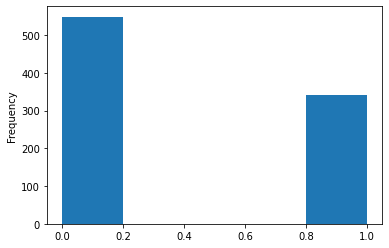

In [ ]:
train["Survived"].plot(kind='hist', bins=5)

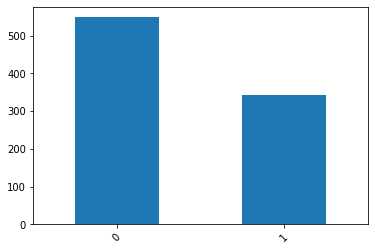

In [ ]:
train["Survived"].value_counts().plot(kind='bar', rot='45')

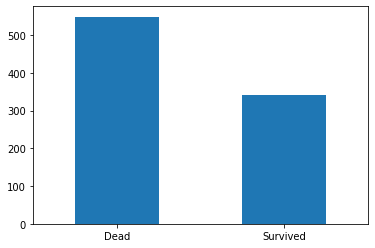

In [ ]:
train["Survived_label"].value_counts().plot(kind='bar', rot='0')

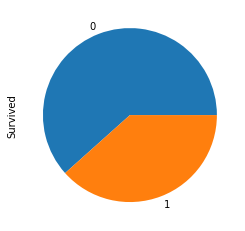

In [ ]:
train["Survived"].value_counts().plot(kind='pie')

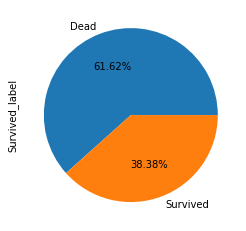

In [ ]:
train["Survived_label"].value_counts().plot(kind='pie', autopct='%1.2f%%')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


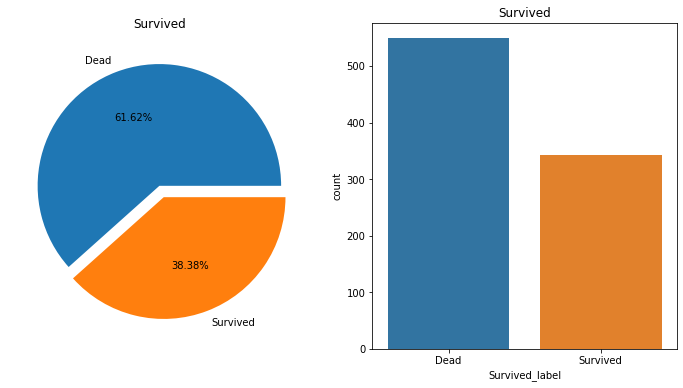

In [ ]:
f, ax = plt.subplots(1,2,figsize=(12,6))

train["Survived_label"].value_counts().plot.pie(explode=[0,0.1], autopct='%1.2f%%',ax=ax[0])

ax[0].set_title("Survived")
ax[0].set_ylabel('')

sns.countplot("Survived_label", data=train, ax=ax[1])

ax[1].set_title("Survived")

plt.show()

In [ ]:
train['Pclass_label'] =train["Pclass"].replace(1, "First Class").replace(2, "Business").replace(3, "Economy")

train[["Pclass","Pclass_label"]].head()

,Pclass,Pclass_label
PassengerId,,
1,3,Economy
2,1,First Class
3,3,Economy
4,1,First Class
5,3,Economy


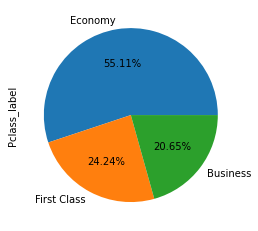

In [ ]:
train["Pclass_label"].value_counts().plot(kind="pie", autopct="%1.2f%%")

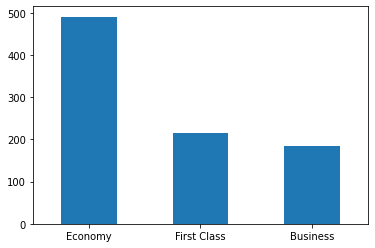

In [ ]:
train["Pclass_label"].value_counts().plot(kind='bar',rot='0')

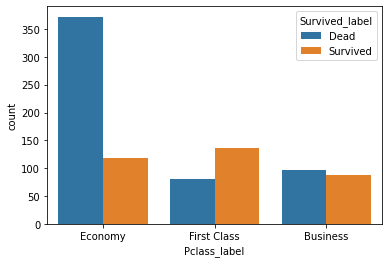

In [ ]:
sns.countplot(data=train, x="Pclass_label", hue="Survived_label")

In [ ]:
train["Embarked_label"] =train["Embarked"].replace('S','Southampton').replace('C','Cherbourg').replace('Q', 'Queenstown')

In [ ]:
train.head(10)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived_label,Pclass_label,Embarked_label
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,N,S,Dead,Economy,Southampton
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,C,Survived,First Class,Cherbourg
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,N,S,Survived,Economy,Southampton
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C,S,Survived,First Class,Southampton
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,N,S,Dead,Economy,Southampton
6,0,3,"Moran, Mr. James",male,30,0,0,330877,8.4583,N,Q,Dead,Economy,Queenstown
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E,S,Dead,First Class,Southampton
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,N,S,Dead,Economy,Southampton
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,N,S,Survived,Economy,Southampton


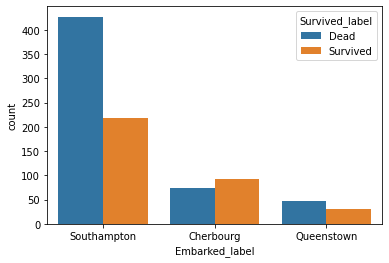

In [ ]:
sns.countplot(data=train,x="Embarked_label", hue="Survived_label")

In [ ]:
train.Name.head()

PassengerId
1                              Braund, Mr. Owen Harris
2    Cumings, Mrs. John Bradley (Florence Briggs Th...
3                               Heikkinen, Miss. Laina
4         Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                             Allen, Mr. William Henry
Name: Name, dtype: object

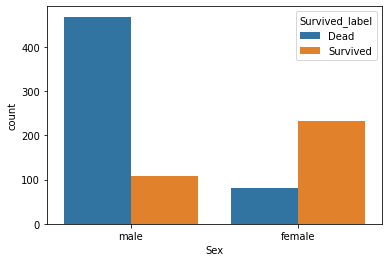

In [ ]:
sns.countplot(data=train, x="Sex", hue="Survived_label")

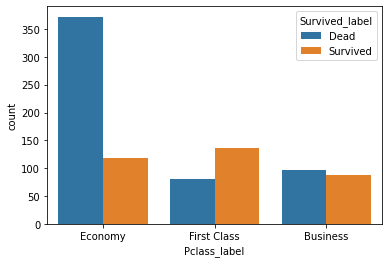

In [ ]:
sns.countplot(data=train, x="Pclass_label", hue="Survived_label")

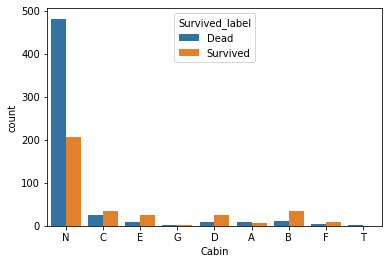

In [ ]:
sns.countplot(data=train, x="Cabin", hue="Survived_label")

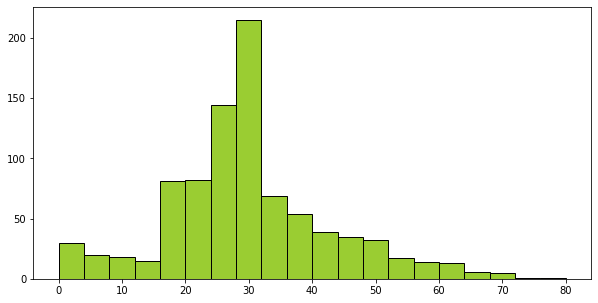

In [ ]:
train["Age"].hist(bins=20, figsize=(10,5), grid=False, edgecolor="black", color="yellowgreen")

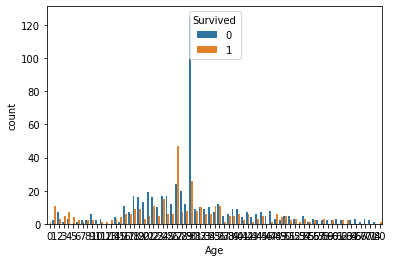

In [ ]:
sns.countplot(x="Age", hue="Survived", data=train)

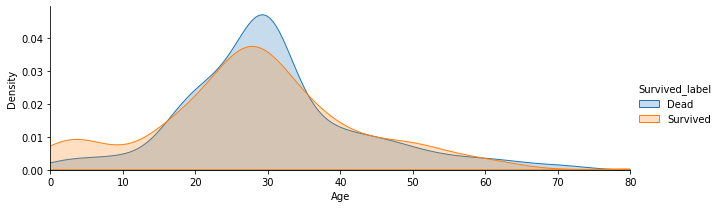

In [ ]:
f= sns.FacetGrid(train,hue="Survived_label", aspect=3)
f.map(sns.kdeplot,"Age",shade=True)
f.set(xlim=(0,train["Age"].max()))
f.add_legend()

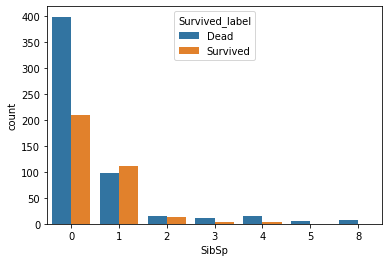

In [ ]:
sns.countplot(data=train,x="SibSp", hue="Survived_label")

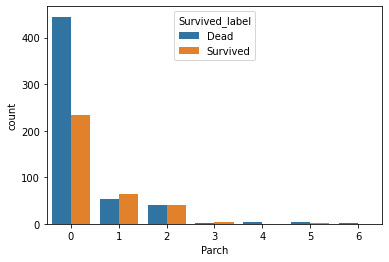

In [ ]:
sns.countplot(data=train,x="Parch", hue="Survived_label")

In [ ]:
train.loc[(train["SibSp"]==0) & (train["Parch"] ==0),"Single"]="Single"
train.loc[(train["SibSp"]!=0)  | (train["Parch"] !=0),"Single"]="Family"

In [ ]:
train[["SibSp","Parch","Single"]].head(6)

,SibSp,Parch,Single
PassengerId,,,
1,1,0,Family
2,1,0,Family
3,0,0,Single
4,1,0,Family
5,0,0,Single
6,0,0,Single


In [ ]:
pd.pivot_table(data=train, index="Single", values="Survived")

,Survived
Single,
Family,0.505650
Single,0.303538


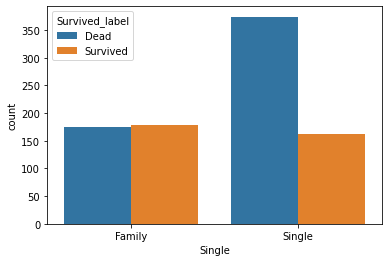

In [ ]:
sns.countplot(data=train, x="Single", hue="Survived_label")

In [ ]:
train["FamilySize"] =train["SibSp"] + train["Parch"] + 1
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived_label,Pclass_label,Embarked_label,Single,FamilySize
PassengerId,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,N,S,Dead,Economy,Southampton,Family,2
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,C,Survived,First Class,Cherbourg,Family,2
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,N,S,Survived,Economy,Southampton,Single,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C,S,Survived,First Class,Southampton,Family,2
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,N,S,Dead,Economy,Southampton,Single,1


In [ ]:
pd.pivot_table(train, index="FamilySize", values="Survived")

,Survived
FamilySize,
1,0.303538
2,0.552795
3,0.578431
4,0.724138
5,0.200000
6,0.136364
7,0.333333
8,0.000000
11,0.000000


In [ ]:
train.loc[train["FamilySize"]==1, "FamilySize_label" ] = "Single"
train.loc[(train["FamilySize"] >1) &(train["FamilySize"] < 5), "FamilySize_label" ] = "Nuclear"
train.loc[train["FamilySize"] >= 5, "FamilySize_label" ] = "Big"
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived_label,Pclass_label,Embarked_label,Single,FamilySize,FamilySize_label
PassengerId,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,N,S,Dead,Economy,Southampton,Family,2,Nuclear
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,C,Survived,First Class,Cherbourg,Family,2,Nuclear
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,N,S,Survived,Economy,Southampton,Single,1,Single
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C,S,Survived,First Class,Southampton,Family,2,Nuclear
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,N,S,Dead,Economy,Southampton,Single,1,Single


In [ ]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.575758,0.523008,0.381594,32.204208,1.904602
std,0.486592,0.836071,13.016827,1.102743,0.806057,49.693429,1.613459
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200,1.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,11.000000


In [ ]:
train.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Survived,1.000000,-0.338481,-0.078570,-0.035322,0.081629,0.257307,0.016639
Pclass,-0.338481,1.000000,-0.334852,0.083081,0.018443,-0.549500,0.065997
Age,-0.078570,-0.334852,1.000000,-0.237436,-0.179667,0.091543,-0.252038
SibSp,-0.035322,0.083081,-0.237436,1.000000,0.414838,0.159651,0.890712
Parch,0.081629,0.018443,-0.179667,0.414838,1.000000,0.216225,0.783111
Fare,0.257307,-0.549500,0.091543,0.159651,0.216225,1.000000,0.217138
FamilySize,0.016639,0.065997,-0.252038,0.890712,0.783111,0.217138,1.000000


In [ ]:
train["Title"] =train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived_label,Pclass_label,Embarked_label,Single,FamilySize,FamilySize_label,Title
PassengerId,,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,N,S,Dead,Economy,Southampton,Family,2,Nuclear,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,C,Survived,First Class,Cherbourg,Family,2,Nuclear,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,N,S,Survived,Economy,Southampton,Single,1,Single,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C,S,Survived,First Class,Southampton,Family,2,Nuclear,Mrs
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,N,S,Dead,Economy,Southampton,Single,1,Single,Mr


In [ ]:
train["Title"].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Don           1
Lady          1
Jonkheer      1
Sir           1
Mme           1
Countess      1
Capt          1
Ms            1
Name: Title, dtype: int64

In [ ]:
train['Title']=train['Title'].replace(['Lady','Countess', 'Dr','Rev','Major','Col','Sir','Jonkheer','Don','Capt'],'Other')
train['Title']=train['Title'].replace('Mlle','Miss')
train['Title']=train['Title'].replace('Ms','Miss')
train['Title']=train['Title'].replace('Mme','Mrs')

In [ ]:
train["Title"].value_counts()

Mr        517
Miss      185
Mrs       126
Master     40
Other      23
Name: Title, dtype: int64

In [ ]:
train["Title_label"]=train['Title'].astype('category').cat.codes

In [ ]:
train.head()


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived_label,Pclass_label,Embarked_label,Single,FamilySize,FamilySize_label,Title,Title_label
PassengerId,,,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,N,S,Dead,Economy,Southampton,Family,2,Nuclear,Mr,2
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,C,Survived,First Class,Cherbourg,Family,2,Nuclear,Mrs,3
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,N,S,Survived,Economy,Southampton,Single,1,Single,Miss,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C,S,Survived,First Class,Southampton,Family,2,Nuclear,Mrs,3
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,N,S,Dead,Economy,Southampton,Single,1,Single,Mr,2


In [ ]:
test["Title"] =test['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test['Title']=test['Title'].replace(['Lady','Countess', 'Dr','Rev','Major','Col','Sir','Jonkheer','Don','Dona','Capt'],'Other')
test['Title']=test['Title'].replace('Mlle','Miss')
test['Title']=test['Title'].replace('Ms','Miss')
test['Title']=test['Title'].replace('Mme','Mrs')
test["Title"].value_counts()
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
PassengerId,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs


In [ ]:
test["Title_label"]=test['Title'].astype('category').cat.codes

In [ ]:
test["Title"].value_counts()

Mr        240
Miss       79
Mrs        72
Master     21
Other       6
Name: Title, dtype: int64

In [ ]:
train = pd.read_csv('stone_docu/titanic/train.csv')
test = pd.read_csv('stone_docu/titanic/test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


totaldata =[train.test]

In [ ]:
totaldata =[train, test]

In [ ]:
for data in totaldata:
    data['Title']=data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

mapping_data ={"Mr":0, "Miss":1, "Mrs":2, "Master":3, "MLLE":3, "Ms":3,"Mme":3, 'Lady':3,'Countess':3, 'Dr':3,'Rev':3,'Major':3,'Col':3,'Sir':3,'Jonkheer':3,'Don':3,'Dona':3,'Capt':3}
for data in totaldata:
    data["Title"] =data["Title"].map(mapping_data)

In [ ]:
test.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2


In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0


In [ ]:
for data in totaldata:
    data.drop("Name", axis=1, inplace=True)

In [ ]:
train.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0.0


In [ ]:
for data in totaldata:
    data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Title        889 non-null    float64
dtypes: float64(3), int64(5), object(4)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

In [ ]:
for data in totaldata:
    data["Age"].fillna(data.groupby("Title")["Age"].transform("median"), inplace=True)

In [ ]:
for data in totaldata:
    data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Title        889 non-null    float64
dtypes: float64(3), int64(5), object(4)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

In [ ]:
for data in totaldata:
    data.loc[data["Age"] <= 16, "Age"] = 0
    data.loc[(data["Age"] > 16) & (data["Age"] <= 26), 'Age' ] = 1
    data.loc[(data["Age"] > 26) & (data["Age"] <= 36), 'Age' ] = 2
    data.loc[(data["Age"] > 36) & (data["Age"] <= 62), 'Age' ] = 3
    data.loc[data["Age"] > 62, "Age"] = 4


In [ ]:
train.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,1.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1,1,female,3.0,1,0,PC 17599,71.2833,C85,C,2.0
2,3,1,3,female,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1,1,female,2.0,1,0,113803,53.1000,C123,S,2.0
4,5,0,3,male,2.0,0,0,373450,8.0500,NaN,S,0.0


In [ ]:
for data in totaldata:
    data["Fare_bin"]=pd.qcut(train["Fare"],5)
    data["Fare_label"]=data["Fare_bin"].astype('category').cat.codes

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Fare_bin,Fare_label
0,1,0,3,male,1.0,1,0,A/5 21171,7.2500,NaN,S,0.0,"(-0.001, 7.854]",0
1,2,1,1,female,3.0,1,0,PC 17599,71.2833,C85,C,2.0,"(39.688, 512.329]",4
2,3,1,3,female,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0,"(7.854, 10.5]",1
3,4,1,1,female,2.0,1,0,113803,53.1000,C123,S,2.0,"(39.688, 512.329]",4
4,5,0,3,male,2.0,0,0,373450,8.0500,NaN,S,0.0,"(7.854, 10.5]",1


In [ ]:
for data in totaldata:
    data.drop("Fare", axis=1, inplace =True)
    data.drop("Fare_bin", axis=1, inplace=True)

In [ ]:
for data in totaldata:
    data["FamilySize"] =data["SibSp"] +data["Parch"] +1

In [ ]:
mapping_data ={1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for data in totaldata:
    data["FamilySize"] =data["FamilySize"].map(mapping_data)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Cabin,Embarked,Title,Fare_label,FamilySize
0,1,0,3,male,1.0,1,0,A/5 21171,NaN,S,0.0,0,0.4
1,2,1,1,female,3.0,1,0,PC 17599,C85,C,2.0,4,0.4
2,3,1,3,female,1.0,0,0,STON/O2. 3101282,NaN,S,1.0,1,0.0
3,4,1,1,female,2.0,1,0,113803,C123,S,2.0,4,0.4
4,5,0,3,male,2.0,0,0,373450,NaN,S,0.0,1,0.0


In [ ]:
for data in totaldata:
    data["Embarked"] =data["Embarked"].fillna("S")

In [ ]:
mapping_data ={"S": 0, "C":1, "Q":2}
for data in totaldata:
    data["Embarked"] =data["Embarked"].map(mapping_data)

In [ ]:
train.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Cabin,Embarked,Title,Fare_label,FamilySize
0,1,0,3,male,1.0,1,0,A/5 21171,NaN,0,0.0,0,0.4
1,2,1,1,female,3.0,1,0,PC 17599,C85,1,2.0,4,0.4
2,3,1,3,female,1.0,0,0,STON/O2. 3101282,NaN,0,1.0,1,0.0
3,4,1,1,female,2.0,1,0,113803,C123,0,2.0,4,0.4
4,5,0,3,male,2.0,0,0,373450,NaN,0,0.0,1,0.0


In [ ]:
for data in totaldata:
    data["Sex"] =data["Sex"].astype("category").cat.codes

In [ ]:
for data in totaldata:
    data.drop("Ticket", axis=1, inplace =True)
    data.drop("Cabin", axis=1, inplace=True)
    data.drop("PassengerId", axis=1,  inplace=True)

In [ ]:
train.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Title,Fare_label,FamilySize
0,0,3,1,1.0,1,0,0,0.0,0,0.4
1,1,1,0,3.0,1,0,1,2.0,4,0.4
2,1,3,0,1.0,0,0,0,1.0,1,0.0
3,1,1,0,2.0,1,0,0,2.0,4,0.4
4,0,3,1,2.0,0,0,0,0.0,1,0.0


In [ ]:
train.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Title,Fare_label,FamilySize
Survived,1.000000,-0.338481,-0.543351,-0.090499,-0.035322,0.081629,0.106811,0.442640,0.317783,0.016639
Pclass,-0.338481,1.000000,0.131900,-0.314046,0.083081,0.018443,0.045702,-0.157297,-0.705206,0.065997
Sex,-0.543351,0.131900,1.000000,0.130828,-0.114631,-0.245489,-0.116569,-0.555324,-0.244943,-0.200988
Age,-0.090499,-0.314046,0.130828,1.000000,-0.268832,-0.171533,-0.036063,-0.168772,0.094761,-0.269433
SibSp,-0.035322,0.083081,-0.114631,-0.268832,1.000000,0.414838,-0.059961,0.291497,0.354974,0.890712
Parch,0.081629,0.018443,-0.245489,-0.171533,0.414838,1.000000,-0.078665,0.346453,0.351317,0.783111
Embarked,0.106811,0.045702,-0.116569,-0.036063,-0.059961,-0.078665,1.000000,0.044684,-0.089125,-0.080281
Title,0.442640,-0.157297,-0.555324,-0.168772,0.291497,0.346453,0.044684,1.000000,0.335372,0.372348
Fare_label,0.317783,-0.705206,-0.244943,0.094761,0.354974,0.351317,-0.089125,0.335372,1.000000,0.418125
FamilySize,0.016639,0.065997,-0.200988,-0.269433,0.890712,0.783111,-0.080281,0.372348,0.418125,1.000000


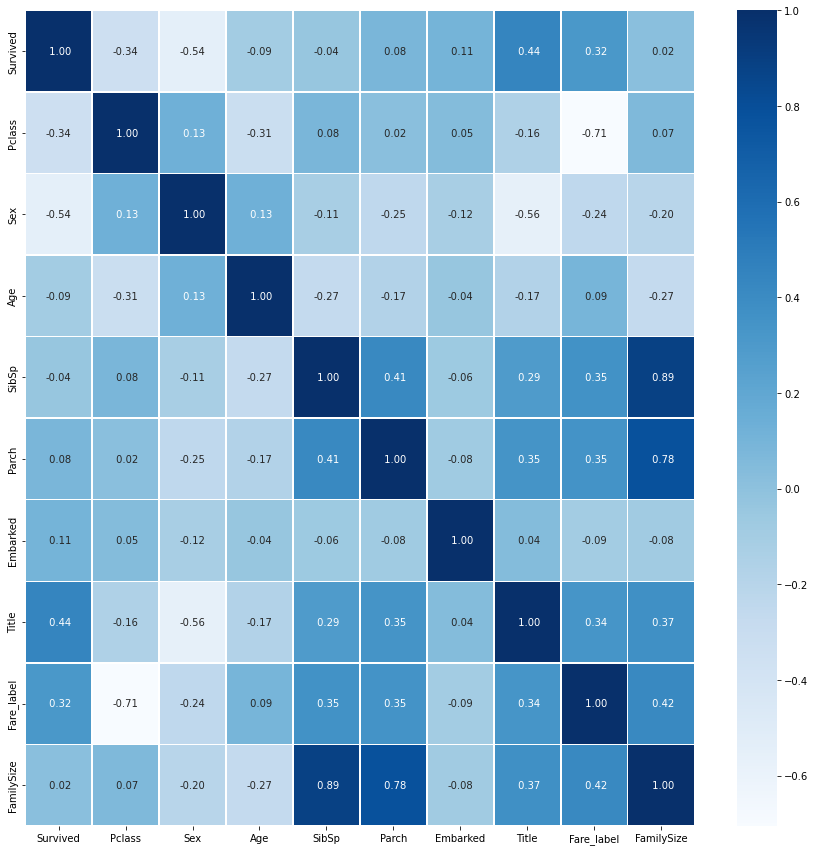

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(data=train.corr(), annot=True, fmt=' .2f', linewidth=.5, cmap='Blues')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

In [ ]:
train_data =train.drop('Survived', axis=1)
target = train['Survived']

train_data.shape, target.shape

((891, 9), (891,))

In [ ]:
train_data

,Pclass,Sex,Age,SibSp,Parch,Embarked,Title,Fare_label,FamilySize
0,3,1,1.0,1,0,0,0.0,0,0.4
1,1,0,3.0,1,0,1,2.0,4,0.4
2,3,0,1.0,0,0,0,1.0,1,0.0
3,1,0,2.0,1,0,0,2.0,4,0.4
4,3,1,2.0,0,0,0,0.0,1,0.0
...,...,...,...,...,...,...,...,...,...
886,2,1,2.0,0,0,0,3.0,2,0.0
887,1,0,1.0,0,0,0,1.0,3,0.0
888,3,0,1.0,1,2,0,1.0,3,1.2
889,1,1,1.0,0,0,1,0.0,3,0.0


In [ ]:
target

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold =KFold(n_splits=10, shuffle=True, random_state=0)

In [ ]:
k_fold

KFold(n_splits=10, random_state=0, shuffle=True)

In [ ]:
clf = KNeighborsClassifier(n_neighbors= 13)
scoring ='accuracy'


In [ ]:
score= cross_val_score(clf, train_data,target, cv=k_fold, n_jobs=1, scoring=scoring)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn

In [ ]:
round(np.mean(score)*100,2)

nan

In [ ]:
clf = DecisionTreeClassifier()
scoring ='accuracy'
score= cross_val_score(clf, train_data,target, cv=k_fold, n_jobs=1, scoring=scoring)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn

In [ ]:
clf =RandomForestClassifier(n_estimators=13)
scoring ='accuracy'
score= cross_val_score(clf, train_data,target, cv=k_fold, n_jobs=1, scoring=scoring)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn

In [ ]:
clf =GaussianNB()
scoring ='accuracy'
score= cross_val_score(clf, train_data,target, cv=k_fold, n_jobs=1, scoring=scoring)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn

In [ ]:
round(np.mean(score)*100,2)

nan

In [ ]:
clf =SVC()
scoring ='accuracy'
score= cross_val_score(clf, train_data,target, cv=k_fold, n_jobs=1, scoring=scoring)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn

In [ ]:
round(np.mean(score)*100,2)

nan